In [2]:
# setup

import numpy as np, pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import tensorflow as tf
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 16,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
    'font.family':"sans-serif",
   'font.sans-serif':'Arial',
   'text.usetex': False,
   }

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist = input_data.read_data_sets("data/fashion", one_hot=True)

rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [4]:
for i in range(10):
    if i==0:
        dz = 0; l1 = 0
    else:
        dz = np.random.choice([0,1,2,5,10,20])
        l1 = np.random.choice([0,0.1,0.5,1,2])
    
    t, v = fully_connected(mnist, pool=2, num_channels=16, 
                           verbose=False, batches=10000, 
                           print_every=500, reg_kind='DZ+L1', 
                           reg_value=[dz,l1])
    print(dz,l1,t,v)

Adding DZ+L1 regularization
0 0 0.87707275 0.831
Adding DZ+L1 regularization
1 1.0 0.88676363 0.8348
Adding DZ+L1 regularization
0 2.0 0.8651091 0.8169
Adding DZ+L1 regularization
20 0.5 0.8824 0.831
Adding DZ+L1 regularization
10 0.1 0.8902 0.8424
Adding DZ+L1 regularization
10 0.5 0.8831818 0.8292
Adding DZ+L1 regularization
20 0.5 0.86636364 0.8157
Adding DZ+L1 regularization
5 1.0 0.892 0.8404
Adding DZ+L1 regularization
1 0.0 0.8474 0.8085
Adding DZ+L1 regularization
0 0.5 0.8821273 0.836


### Just L1...

In [31]:
for l1 in [1e-2,1e-1,1e-0,1e1,1e2,1e3,1e4]:
    t, v, weights = fully_connected(mnist, pool=2, num_channels=16, 
                           verbose=False, batches=10000, return_weights=True,
                           print_every=500, reg_kind='DZ+L1', 
                           reg_value=[0,l1])
    print(l1,t,v)

Adding DZ+L1 regularization
0.01 0.86234546 0.8092
Adding DZ+L1 regularization
0.1 0.86390907 0.8204
Adding DZ+L1 regularization
1.0 0.8867818 0.8301
Adding DZ+L1 regularization
10.0 0.8956182 0.8473
Adding DZ+L1 regularization
100.0 0.8420727 0.8056
Adding DZ+L1 regularization
1000.0 0.76234543 0.7427
Adding DZ+L1 regularization
10000.0 0.60678184 0.6089


In [43]:
t, v, weights = fully_connected(mnist, pool=2, num_channels=16, 
                           verbose=False, batches=10000, return_weights=True,
                           print_every=500, reg_kind='DZ+L1', 
                           reg_value=[0,100])
print(l1,t,v)

Adding DZ+L1 regularization
10000.0 0.87643635 0.8332


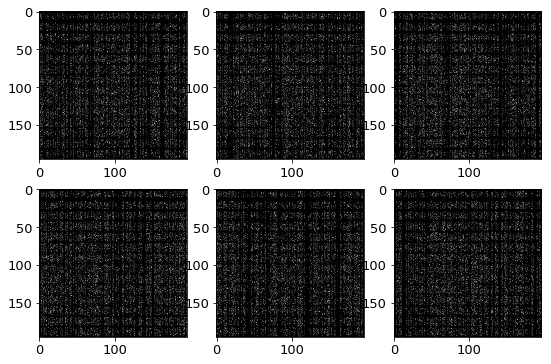

In [44]:
visualize_general_weights(weights, num_channels=16, pool=2)

### Just DZ

In [45]:
for dz in [0, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]:
    t, v, weights = fully_connected(mnist, pool=2, num_channels=16, 
                           verbose=False, batches=10000, return_weights=True,
                           print_every=500, reg_kind='DZ+L1', 
                           reg_value=[dz,0])
    print(dz,t,v)

Adding DZ+L1 regularization
0 0.8897091 0.8411
Adding DZ+L1 regularization
0.1 0.9067091 0.8486
Adding DZ+L1 regularization
0.2 0.8834182 0.8329
Adding DZ+L1 regularization
0.5 0.8726364 0.8257
Adding DZ+L1 regularization
1 0.8399818 0.8001
Adding DZ+L1 regularization
2 0.89245456 0.8401
Adding DZ+L1 regularization
5 0.8930727 0.8422
Adding DZ+L1 regularization
10 0.86521816 0.8212
Adding DZ+L1 regularization
20 0.8404545 0.7993
Adding DZ+L1 regularization
50 0.8981091 0.8512
Adding DZ+L1 regularization
100 0.85816365 0.8183


In [46]:
visualize_general_weights(weights, num_channels=16, pool=4)

ValueError: cannot reshape array of size 614656 into shape (49,49,16)